# 1.Exploratory Questions

 ### 1.1 What proportion of customers with a credit score below 0.2 made a claim in the last year?

In [1]:
# importing the library
import pandas as pd

In [2]:
# Reading the dataset
dataset=pd.read_csv("preprocessed_customerdata.csv")

In [3]:
dataset

,id,age,gender,race,driving_experience,education,income,vehicle_ownership,vehicle_year,married,...,postal_code,vehicle_type,speeding_violations,DUIs,past_accidents,outcome,telematic_score,credit_scores,annual_mileages,monthly_mileages
0,569520,65+,female,majority,0-9y,high school,high,True,after 2015,False,...,10238,sedan,0,0,0,False,37.454012,0.629027,12000.000000,1000.000000
1,750365,16-25,male,majority,0-9y,none,very low,False,before 2015,False,...,10238,sedan,0,0,0,True,95.071431,0.357757,16000.000000,1333.333333
2,199901,16-25,female,majority,0-9y,high school,low,True,before 2015,False,...,10238,sedan,0,0,0,False,73.199394,0.493146,11000.000000,916.666667
3,478866,16-25,male,majority,0-9y,university,low,True,before 2015,False,...,32765,sedan,0,0,0,False,59.865848,0.206013,11000.000000,916.666667
4,731664,26-39,male,majority,10-19y,none,low,True,before 2015,False,...,32765,sedan,2,0,1,True,15.601864,0.388366,12000.000000,1000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,high,True,before 2015,False,...,10238,sedan,0,0,1,False,85.765599,0.582787,16000.000000,1333.333333
9996,910346,26-39,female,majority,10-19y,none,medium,True,after 2015,False,...,32765,sedan,1,0,0,False,89.750884,0.522231,11697.003207,974.750267
9997,468409,26-39,male,majority,0-9y,high school,medium,True,before 2015,False,...,10238,sedan,0,0,0,False,94.670792,0.470940,14000.000000,1166.666667
9998,903459,26-39,female,majority,10-19y,high school,very low,False,before 2015,False,...,10238,sedan,2,0,1,True,39.748799,0.364185,13000.000000,1083.333333


In [4]:
#Filtering the outcome and vehicle _year column based on the creddit score below 0.2
scoreBelow=dataset[dataset["credit_scores"]<=0.2][["outcome","vehicle_year"]]

In [5]:
#len of the score below 0.2
len(scoreBelow)

98

In [6]:
#Filtering the dataset for the last year(As per the dataset only vehicle year is present.So calculated using the same.)
claim=scoreBelow[scoreBelow["vehicle_year"]=="after 2015"]["outcome"]

In [7]:
print("The total count of the credit score:",len(dataset))

The total count of the credit score: 10000


In [8]:
print("The Total count of below 0.2:",len(claim))

The Total count of below 0.2: 11


In [9]:
claimedTrue=claim.value_counts()[1]

In [10]:
print("The claim for below 0.2:",claimedTrue)

The claim for below 0.2: 1


In [11]:
percentage=(claimedTrue/len(dataset))*100

In [12]:
print(percentage,"% of the customer claimed with credit score below 0.2 in the last year ")

0.01 % of the customer claimed with credit score below 0.2 in the last year 


In [13]:
print("{}:{} proportion of customers with a credit score below 0.2 made a claim in the last year".format(claimedTrue,len(dataset)))

1:10000 proportion of customers with a credit score below 0.2 made a claim in the last year


## 1.2.  Produce a maximum of 3 plots to help the client understand their data better. 
## Explain what the plots show/any insight they provide the client about their data.

In [14]:
### univarite Analysis--> Single column Analysis

In [15]:
import seaborn as sb

<AxesSubplot:xlabel='credit_scores'>

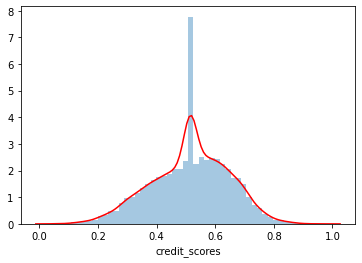

In [16]:
#Here i have shown the density curve for the credit_score. This graph tells that majority of points lies between 0.2 to 0.8
sb.distplot(dataset['credit_scores'],hist=True,kde=True,kde_kws={'color':'red'})

<AxesSubplot:xlabel='past_accidents'>

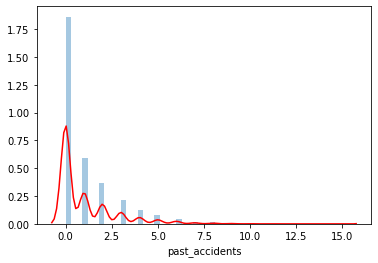

In [17]:
# This plot tells that majority value lies in the Zero.So accident happening is less.
sb.distplot(dataset['past_accidents'],hist=True,kde=True,kde_kws={'color':'red'})

In [18]:
import matplotlib.pyplot as plt

<AxesSubplot:>

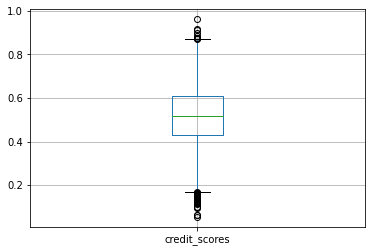

In [19]:
# Box plot tells that percentile of the column,here have plotted for the single variable to see clear value.
#down 1st horizontal line min -->min of the between 0.2
#2nd horizontal line q1-->25% of the data(person values) lies between 0.4.2
#3rd horizontal line q2-->50% of the data(person values) lies between 0.5
#4th horizontal line q3-->75% of the data(person values) lies between 0.6
#5th horizontal line q2-->100% of the data(person values) lies between 0.8

#very small chnage from 25% to 50 %
dataset.boxplot(column=["credit_scores"])